<a href="https://colab.research.google.com/github/fakhrimuhyiddin/tugas10-python/blob/main/tugas_python_minggu_11_FakhriM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
\#mounting gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

In [10]:
#ekstrack file zip
import zipfile,os
local_zip = ('/content/drive/MyDrive/dataset/GMB_01.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dataset')
zip_ref.close()

In [11]:
#ekstrack file zip
import zipfile,os
local_zip = ('/content/drive/MyDrive/dataset/GMB_02.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dataset')
zip_ref.close()

In [12]:
#ekstrack file zip
import zipfile,os
local_zip = ('/content/drive/MyDrive/dataset/GMB_03.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dataset')
zip_ref.close()

In [13]:
#ekstrack file zip
import zipfile,os
local_zip = ('/content/drive/MyDrive/dataset/GMB_04.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dataset')
zip_ref.close()

In [14]:
#ekstrack file zip
import zipfile,os
local_zip = ('/content/drive/MyDrive/dataset/GMB_05.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dataset')
zip_ref.close()

In [77]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [78]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [79]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((160, 160))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [80]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [81]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [82]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [85]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.1, shuffle=True)
print(trainX.shape)
print(testX.shape)

(525, 160, 160, 3)
(59, 160, 160, 3)


In [86]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense


In [87]:
model1 = Sequential()
model1.add(Convolution2D(32, (3,3), activation='relu', input_shape=(160,160,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(128, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(256, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 77, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 256)      

In [88]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [89]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
17/17 [==============================] - 1s 38ms/step - loss: 1.6471 - accuracy: 0.2095 - val_loss: 1.6115 - val_accuracy: 0.1525
Epoch 2/25
17/17 [==============================] - 0s 20ms/step - loss: 1.5868 - accuracy: 0.2724 - val_loss: 1.6243 - val_accuracy: 0.2542
Epoch 3/25
17/17 [==============================] - 0s 20ms/step - loss: 1.3813 - accuracy: 0.4419 - val_loss: 1.4188 - val_accuracy: 0.4407
Epoch 4/25
17/17 [==============================] - 0s 20ms/step - loss: 1.1080 - accuracy: 0.5333 - val_loss: 1.2419 - val_accuracy: 0.6271
Epoch 5/25
17/17 [==============================] - 0s 20ms/step - loss: 0.9094 - accuracy: 0.6438 - val_loss: 1.3070 - val_accuracy: 0.5593
Epoch 6/25
17/17 [==============================] - 0s 20ms/step - loss: 0.8193 - accuracy: 0.7105 - val_loss: 1.1382 - val_accuracy: 0.6271
Epoch 7/25
17/17 [==============================] - 0s 21ms/step - loss: 0.5889 - accuracy: 0.7810 - val_loss: 0.8547 - val_accuracy: 0.8136
Epoch 8/25
17

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


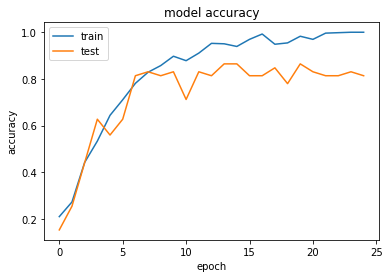

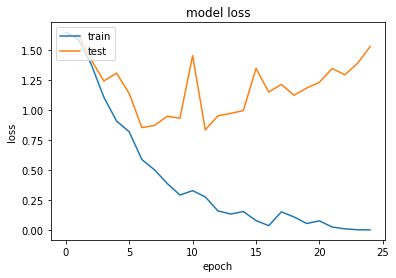

In [92]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       1.00      0.74      0.85        19
      GMB_02       0.64      0.78      0.70         9
      GMB_03       0.70      0.70      0.70        10
      GMB_04       0.75      1.00      0.86         9
      GMB_05       0.92      0.92      0.92        12

    accuracy                           0.81        59
   macro avg       0.80      0.83      0.80        59
weighted avg       0.84      0.81      0.82        59



In [94]:
model1.save('nnmodel_daun')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun/assets


In [95]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

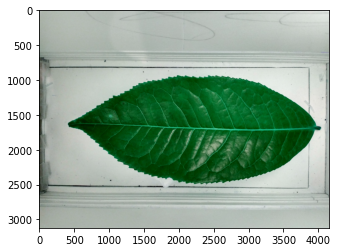

In [98]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [99]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((160, 160))) / 255.0
image_testing.shape

(160, 160, 3)

In [100]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 160, 160, 3)


In [102]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9993134e-01 6.8693334e-05 2.1075816e-14 3.3932883e-12 8.7792849e-09]]
['GMB_01']
